# Prep Course Capstone

# Ozlem Celik

<b>Data: 


This dataset is chosen from www.kaggle.com which is very well known website publishing datasets in every field. The title of this dataset is "Google Play Store" which represents mobile applications with their properties including their distribution from many perspective.This file contains all the details of mobile applications on Google play store that includes general view about the application. Some data parameters are: application updates,versions, categorie, instalization, rating, reviews,genres,type, price, and size.

<b>Analytic Questions:

1)What are the most downloded applications with respect to Category?What is the affect of the application install on user rating?
<br>2)What's the category distribution of apps with respect to its price? 
<br>3)What's the distribution of content rating and genre types of apps on entire store?


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# upload date set into data frame
df = pd.read_csv("/Users/OzlemCelik/Desktop/googleplaystore_3.csv", low_memory=False)

In [3]:
df.shape

(10840, 13)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#drop duplicate rows
df = df.drop_duplicates()

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [7]:
df.dropna(how='any', inplace=True)

In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
df.describe()

,Rating,Reviews
count,8886.000000,8.886000e+03
mean,4.187959,4.730928e+05
std,0.522428,2.906007e+06
min,1.000000,1.000000e+00
25%,4.000000,1.640000e+02
50%,4.300000,4.723000e+03
75%,4.500000,7.131325e+04
max,5.000000,7.815831e+07


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10839
Data columns (total 13 columns):
App               8886 non-null object
Category          8886 non-null object
Rating            8886 non-null float64
Reviews           8886 non-null int64
Size              8886 non-null object
Installs          8886 non-null object
Type              8886 non-null object
Price             8886 non-null object
Content Rating    8886 non-null object
Genres            8886 non-null object
Last Updated      8886 non-null object
Current Ver       8886 non-null object
Android Ver       8886 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 971.9+ KB


In [11]:
df.shape

(8886, 13)

After remove missing data, our data contain 8,886 records with 13 fields

In [ ]:
# optimize figure size
plt.rcParams['figure.figsize'] = (10.0, 5.0) 
plt.rcParams.update({'font.size': 8})

# Question 1: 
<b>What are the most downloded applications with respect to Category?  What is the affect of the application install on user rating?

<b>Category

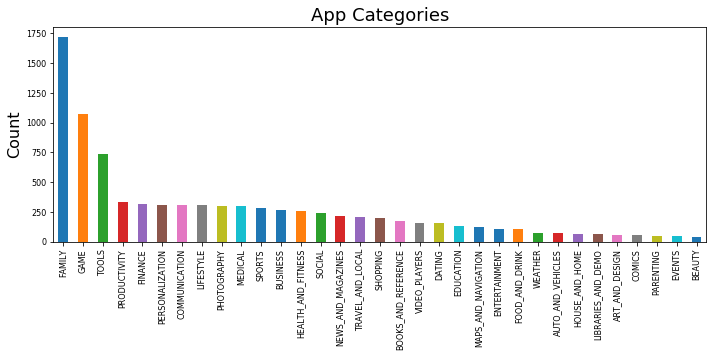

In [42]:
df['Category'].value_counts().plot(kind='bar')
plt.ylabel('Count', fontsize=16)
plt.title("App Categories", fontsize=18);
plt.tight_layout()

<br>As seen from the graphic above Family, Game and Tools categories are the most downloaded applications respectively, while Comics, Parenting and Beauty categories are the least downloaded applications.</br>

<b>Rating

In [14]:
df['Rating'].describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

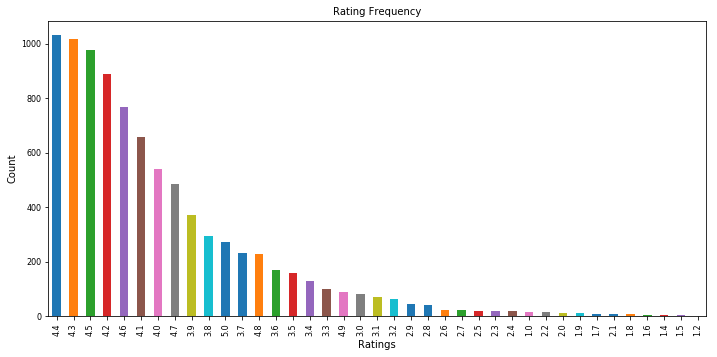

In [44]:
df['Rating'].value_counts().plot(kind='bar')
plt.ylabel('Count', fontsize=10)
plt.xlabel('Ratings', fontsize=10)
plt.title("Rating Frequency", fontsize=10)
plt.tight_layout()

In [16]:
print('Average app rating = ', np.mean(df['Rating']))
print('Standard Deviation on Rating=',np.std(df['Rating']))

Average app rating =  4.187958586540625
Standard Deviation on Rating= 0.5223985490646044


The rating mean is 4.2. We can conclude that many people rate the apps more than 4 stars. 

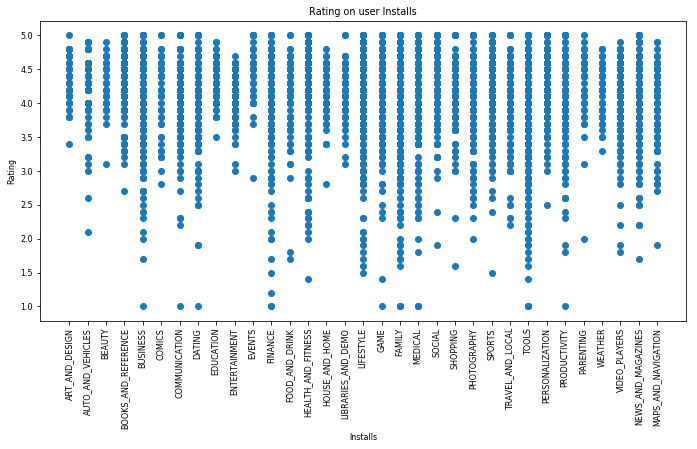

In [45]:
plt.scatter(x = df['Category'], y = df['Rating'])
plt.ylabel('Rating')
plt.xlabel('Installs') 
plt.title('Rating on user Installs')
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

The application categories like education, entertainment, art & design, libraries & demos and weather have great rating values beside having less number of installs. As result, rating of application in each category is not different too much 


<b>2)What's the rating distribution and intalls of apps with respect to its price? 

<b>Price

In [23]:
df['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

Data is in object type, in format of dollar sign.

In [24]:
#Drop of the $ sign
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [25]:
df['Price'].describe()

count    8886.000000
mean        0.963526
std        16.194792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Average of price is around 0.96, but most of them are free.The most expensive app is 400 dollar !!!.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text xticklabel objects>)

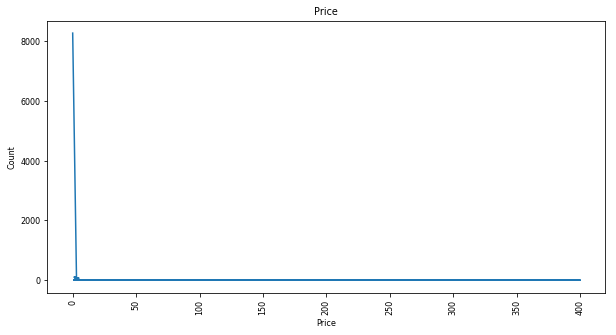

In [46]:
df.price=df['Price'].value_counts().plot()

plt.ylabel('Count')
plt.xlabel('Price') 
plt.title('Price')

plt.xticks(rotation=90)


From this graph, we can observe the most of the applications are free and users prefer free apps than paid apps. We cannot observe the price ranges rom the graph but it seems that the ranges between price values is quite high.

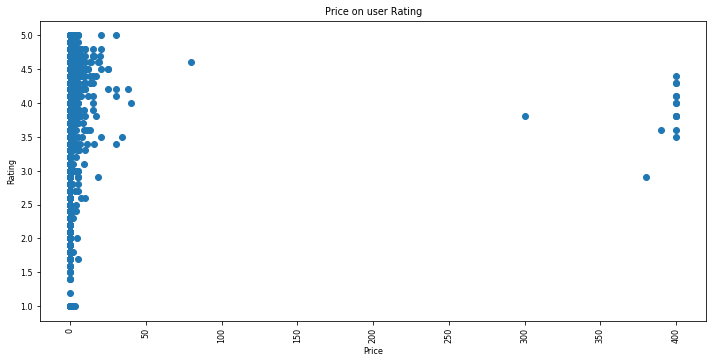

In [47]:
plt.scatter(x = df['Price'], y = df['Rating'])
plt.ylabel('Rating')
plt.xlabel('Price') 
plt.title('Price on user Rating')
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

We just mentioned that price ranges were pretty above at previous graph. We can observe it better in here. We cannot conclude there is a direct proportion between price and rating. Higher price application may make customer disappointed, if they are not good enough.

In [48]:
df.loc[df['Price'] == 0, 'PriceRange'] = '0 Free'
df.loc[(df['Price'] > 0) & (df['Price'] <= 0.99), 'PriceRange'] = '1 cheap'
df.loc[(df['Price'] > 0.99) & (df['Price'] <= 2.99), 'PriceRange']   = '2 not cheap'
df.loc[(df['Price'] > 2.99) & (df['Price'] <= 4.99), 'PriceRange']   = '3 normal'
df.loc[(df['Price'] > 4.99) & (df['Price'] <= 14.99), 'PriceRange']   = '4 expensive'
df.loc[(df['Price'] > 14.99) & (df['Price'] <= 29.99), 'PriceRange']   = '5 too expensive'
df.loc[(df['Price'] > 29.99), 'PriceRange']  = '6 too much expensive'

df[['PriceRange', 'Rating']].groupby(['PriceRange'], as_index=False).mean()

,PriceRange,Rating
0,0 Free,4.182514
1,1 cheap,4.300962
2,2 not cheap,4.293671
3,3 normal,4.238816
4,4 expensive,4.245000
5,5 too expensive,4.252632
6,6 too much expensive,3.910526


Price are not effect to rating ,but if it is very expensive, it might get low rating

<b> Installs

In [29]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Data is object type, and contain the plus sign and comma

In [30]:
#Clean the '+' sign and ',' sign and convert to integer
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: int(x))

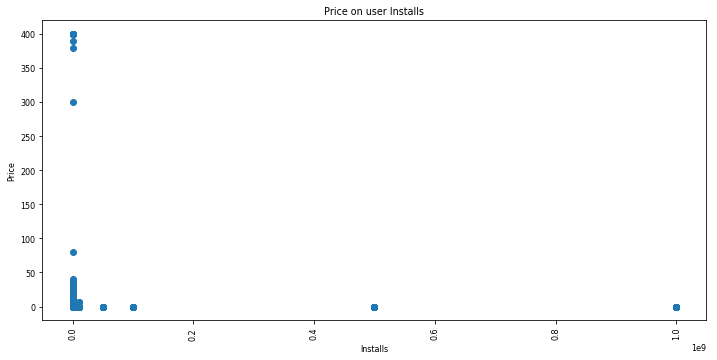

In [49]:
plt.scatter(x = df['Installs'], y = df['Price'])
plt.ylabel('Price')
plt.xlabel('Installs') 
plt.title('Price on user Installs')
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

You can see a better visual comparison between price versus number of installs 

<b>Type

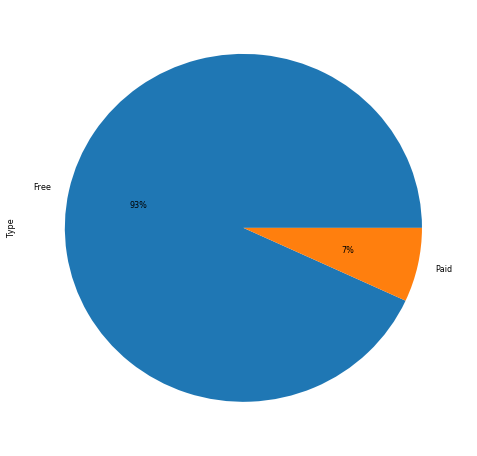

In [52]:
plt.figure(figsize=(8,8))

df.Type.value_counts().plot(kind="pie",autopct='%1.0f%%')

Most of application in this store are free (93%).

# Question 3:

<b>3) What's the distribution of Content Rating and Reviews of apps on entire store?

<b>Content Rating

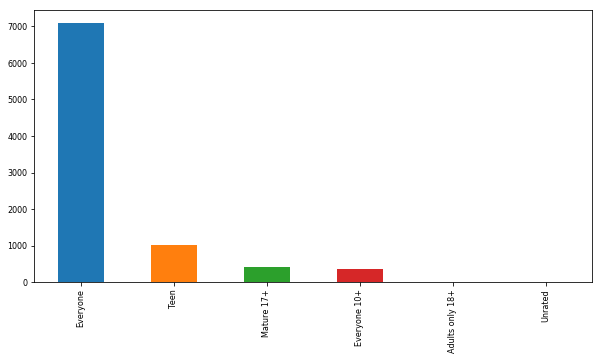

In [53]:
#rename columns
df.rename(columns={'Content Rating':'Content_Rating'}, inplace=True)
df.Content_Rating.value_counts().plot(kind="Bar")

<b>Reviews

In [34]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

Data is object type, we need to convert to int

In [35]:
#convert to int
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [36]:
print('Average app Reviews = ', np.mean(df['Reviews']))
print('Average app Reviews = ', np.std(df['Reviews']))

Average app Reviews =  473092.80317353137
Average app Reviews =  2905843.3800672926


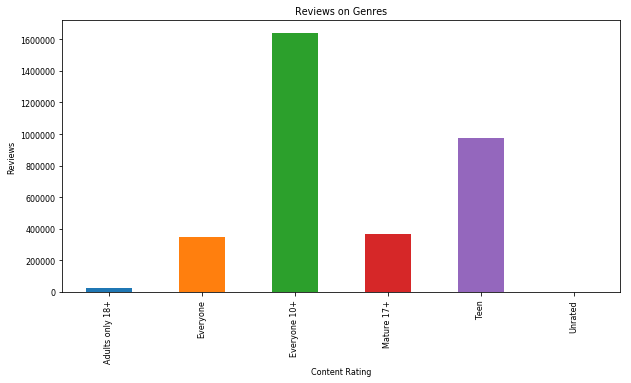

In [54]:
df.groupby('Content_Rating').Reviews.mean().plot(kind = "bar")
plt.xlabel('Content Rating')
plt.ylabel('Reviews')
plt.title('Reviews on Genres');

When we analyze these two graphs, they demonstrate that the number of content rating is high on "everyone" and if we assess with respect to number review then "everyone10+" is higher among the others. 

# Statistical Question:


In [55]:
# Are the test and control groups significantly different?
from scipy.stats import ttest_ind
print(ttest_ind(df.Rating,df.Price,equal_var=False))

Ttest_indResult(statistic=18.758808240795645, pvalue=4.951408197694032e-77)


As seen from above the p-value is so low, this means that differences between the Rating and Price parameters are statistically significant, and not a result of random chance.

The data set and corresponding p-value shows that there is a statistical difference between Rating and Price parameters , a rejection of the null hypothesis since there is no difference between groups

# Further Research

For future work, we can take a deeper look on user profiles and behaviors on using apps. We will try to estimate how the app usage varies with respect to user age, gender, usage period, etc. and so on.